In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

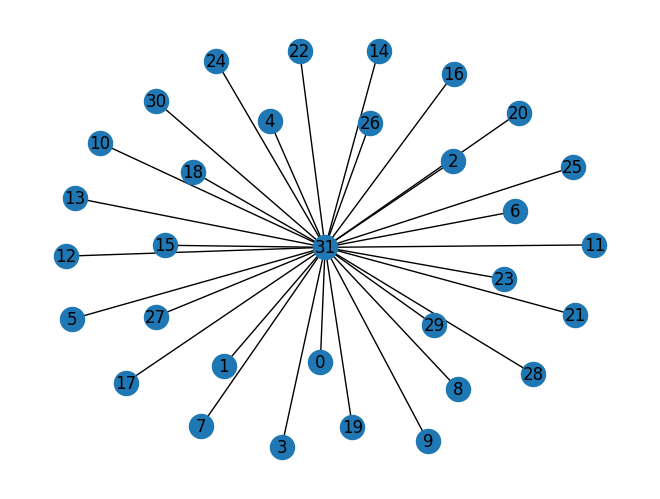

In [3]:
#A01.1 Building and Visualizing Network

#1.Build a star network
star = nx.Graph()

#Add nodes and edges
star.add_node(31)
for i in range(31):
    star.add_node(i)
    star.add_edge(31, i)

#Draw the network
nx.draw(star, with_labels=True)

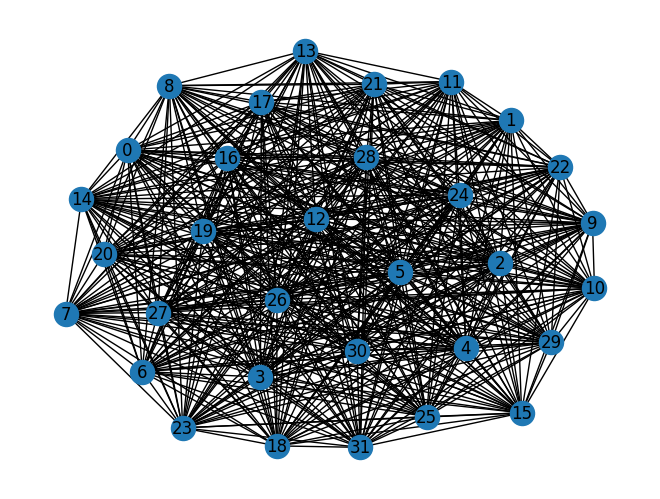

In [4]:
#2. Build a fully connected network
fully_connected = nx.complete_graph(32)

#Draw the network
nx.draw(fully_connected, with_labels=True)

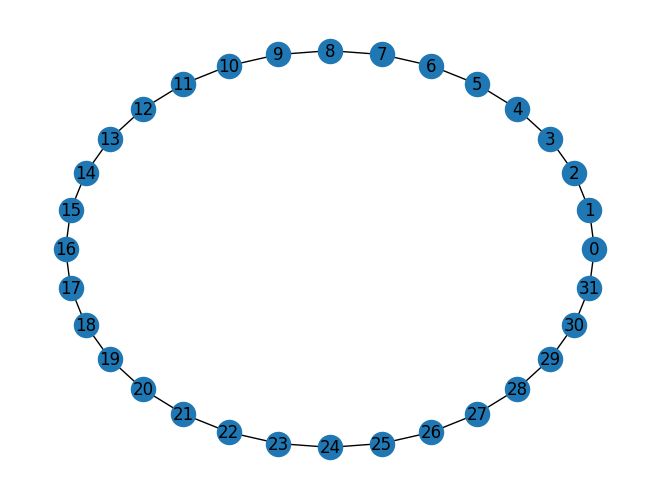

In [5]:
#3. Build 1-D lattice with periodic boundary. Degree of each node=2
lattice = nx.Graph()
for i in range(32):
    lattice.add_node(i)
    if i > 0:
        lattice.add_edge(i-1, i)

lattice.add_edge(0, 31)

#Draw the network
nx.draw_circular(lattice, with_labels=True)

In [6]:
#A01.2 Global Properties

#Load networks
g_k = nx.read_gml("data/graph_karate.gml")
g_n = nx.read_gml("data/graph_netsci.gml")
g_f = nx.read_gml("data/graph_facebook.gml")

In [7]:
#A01.2a Global Properties

#1. Average degrees and density of each dataset
#Network karate
ave_kdgrees = 2 * g_k.number_of_edges() / g_k.number_of_nodes()
den_k = 2 * g_k.number_of_edges() / (g_k.number_of_nodes() * (g_k.number_of_nodes() - 1))
print("Network Karate:")
print("Average degree:" + str(ave_kdgrees))
print("Density:" + str(den_k))

#Network netsci
ave_ndgrees = 2 * g_n.number_of_edges() / g_n.number_of_nodes()
den_n = 2 * g_n.number_of_edges() / (g_n.number_of_nodes() * (g_n.number_of_nodes() - 1))
print("Network Netsci:")
print("Average degree:" + str(ave_ndgrees))
print("Density:" + str(den_n))

#Network facebook
ave_fdgrees = 2 * g_f.number_of_edges() / g_f.number_of_nodes()
den_f = 2 * g_f.number_of_edges() / (g_f.number_of_nodes() * (g_f.number_of_nodes() - 1))
print("Network Facebook:")
print("Average degree:" + str(ave_fdgrees))
print("Density:" + str(den_f))


Network Karate:
Average degree:4.588235294117647
Density:0.13903743315508021
Network Netsci:
Average degree:3.753593429158111
Density:0.0025709544035329526
Network Facebook:
Average degree:43.69101262688784
Density:0.010819963503439287


In [8]:
#2. function max_degree
def max_degree(network):
    n_degrees = network.degree()
    max_d = 0
    for i in network.nodes():
        if n_degrees[i] > max_d:
            max_d = n_degrees[i]
            tuple = (i, max_d)
    return tuple
    
#Test
print(max_degree(g_k))
print(max_degree(g_n))
print(max_degree(g_f))

(33, 17)
('33', 34)
('107', 1045)


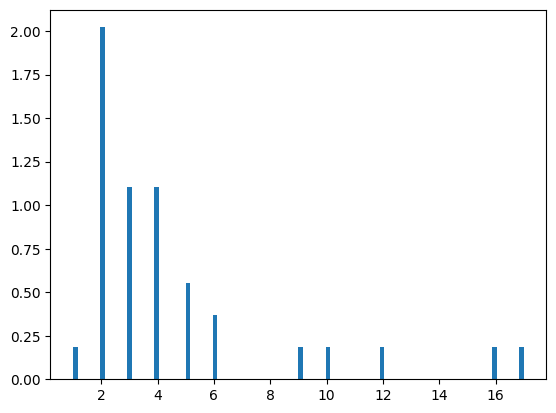

In [9]:
#A01.2b Degree Distributions

#Network karate
g_kdegrees = g_k.degree()
kdegrees = [ g_kdegrees[i] for i in g_k.nodes() ]
_ = plt.hist(kdegrees, bins = 100, density = True)


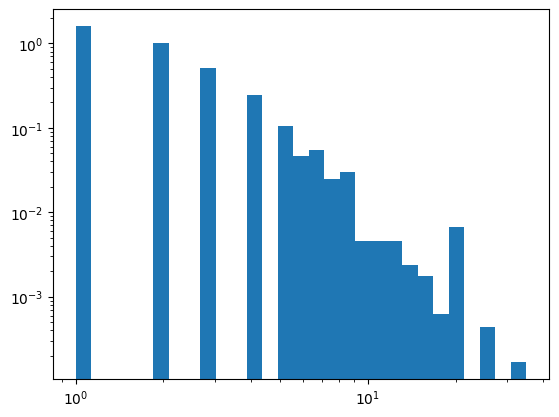

In [10]:
#Network netsci
g_ndegrees = g_n.degree()
ndegrees = [ g_ndegrees[i] for i in g_n.nodes() ]
my_bins = np.logspace(np.log10(min(ndegrees)),np.log10(max(ndegrees) +1), 30 ) 
_ = plt.hist(ndegrees, bins = my_bins, density = True)
plt.xscale('log')
plt.yscale('log')

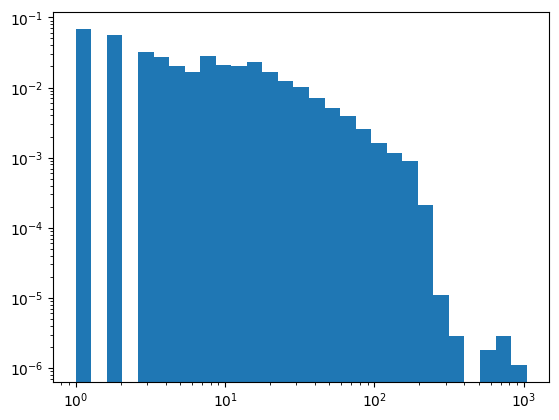

In [11]:
#Network facebook
g_fdegrees = g_f.degree()
fdegrees = [ g_fdegrees[i] for i in g_f.nodes() ]
my_bins = np.logspace(np.log10(min(fdegrees)),np.log10(max(fdegrees) +1), 30 ) 
_ = plt.hist(fdegrees, bins = my_bins,density = True)
plt.xscale('log')
plt.yscale('log')